# Закономерности, определяющие успешность игры.

Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение общей информации.

Для начала подгрузим все бибилиотеки, которые могут нам пригодиться:

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

Прочитаем файл и сохраним его в переменной games:

In [2]:
games = pd.read_csv('/datasets/games.csv', index_col=0)
games.head(10)

,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
Name,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16715 entries, Wii Sports to Winning Post 8 2016
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16715 non-null  object 
 1   Year_of_Release  16446 non-null  float64
 2   Genre            16713 non-null  object 
 3   NA_sales         16715 non-null  float64
 4   EU_sales         16715 non-null  float64
 5   JP_sales         16715 non-null  float64
 6   Other_sales      16715 non-null  float64
 7   Critic_Score     8137 non-null   float64
 8   User_Score       10014 non-null  object 
 9   Rating           9949 non-null   object 
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


У нас имеется табличка, которая содержит слежующие данные:
1. Name — название игры 
2. Platform — платформа - тип данных object - оставим неизменным;
3. Year_of_Release — год выпуска - тип данных - float64 - надо предобразовать в формат "дата и время";
4. Genre — жанр игры - тип данных object - оставим неизменным;
5. NA_sales — продажи в Северной Америке (миллионы проданных копий) - тип данных float64 - оставим неизменным, т.к. речь идет о миллионах, дробных частей не избежать;
6. EU_sales — продажи в Европе (миллионы проданных копий) - тип данных float64 - оставим неизменным, т.к. речь идет о миллионах, дробных частей не избежать;
7. JP_sales — продажи в Японии (миллионы проданных копий) - тип данных float64 - оставим неизменным, т.к. речь идет о миллионах, дробных частей не избежать;
8. Other_sales — продажи в других странах (миллионы проданных копий) - тип данных float64 - оставим неизменным, т.к. речь идет о миллионах, дробных частей не избежать;
9. Critic_Score — оценка критиков (максимум 100) - тип данных float64 - посмотрим, если есть дробные значения, оставим как есть, если таковых нет, то заменим на int - так будет проще восприниматься информация и таблица будет красивее;
10. User_Score — оценка пользователей (максимум 10) - тип данных очевидно надо менять на float64, так как данные содержат числовую оценку с дробной составляющей.
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. - тип данных object  - т.к. оценка буквенная оставим тип данных неизменным.

В таблице 10 колонок и 16715 строк. 

Хотелось бы, чтобы столбец с названиями игр не был представлен в виде столбца с индексами. Исправим это:

In [4]:
games = games.reset_index()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Теперь предлагаю посмотреть уникальные значения в этом столбце, чтобы проверить, нет ли неявных дубликатов в нашей таблице:

In [5]:
games['Name'].value_counts().head()

Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
FIFA 14                         9
Ratatouille                     9
Name: Name, dtype: int64

Предлагаю для начала привести все названия к нижнему регистру:

Теперь давайте посмотрим, почему у нас 12 строк с названием игры Need for Speed: Most Wanted:

In [6]:
games_nfs = games.query('Name == "Need for Speed: Most Wanted"')
games_nfs

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Теперь нужно изменить названия колонок - сделать так, чтобы они был записаны в нижнем регистре.

In [7]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Так же предлагаю сразу проверить таблицу на явные дубликаты:

In [8]:
games.duplicated().sum()

0

Явных дубликатов нет - можно продолжить работу.

## Подготовка данных.

### Типы данных.

#### Начнем со столбца year_of_release:

Изменим тип данных на "дата и время":

In [9]:
games['year_of_release'] = games['year_of_release'].astype(float)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В дальнейшей работе выяснилось, что строить графики с типом данных "дата и время не получается". Так что придется "закомментировать" наше изменение типа данных.

Посмотрим, какие уникальные значения содержит этот столбец:

In [10]:
games['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

Никаких странностей не замечено.

#### Столбец  critic_score.

Посмотрим, если есть дробные значения, оставим как есть, если таковых нет, то заменим на int - так будет проще восприниматься информация и таблица будет красивее.

In [11]:
games['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

Дробных значений нет - хотелось бы преобразовать в тип данных int. Нам может воспрепятствовать наличие пропусков. Проверим, есть ли они:

In [12]:
games['critic_score'].isna().sum()

8578

Пропуски есть. Логичного способа их заполнить я пока не вижу - оценка критиков - вещь непредсказуемая - воспользоваться средним или медианным значением будет крайне опасно для объективности анализа. Предлагаю оставить столбец без изменений.

#### Столбец user_score.

Оценка пользователей - предлагаю для начала посмотреть, какие уникальные значения содержит столбец:

In [13]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
1.3       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Помимо числовых значений, столбец содержит строки со значением tbd - предполагаемая расшифровка "подлежит уточнению" (спасибо google-переводчику. Т.е. это пропущенное значение, которое ничем кроме NaN заменить невозможно. Нам скорее всего предстоит проводить арифметические операции с содержанием этого столбца, так что стоит заменить tbd на NaN. Так и сделаем:

In [14]:
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan
games['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.6      2
1.3      2
9.6      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

Теперь поменяем тип данных на float

In [15]:
games['user_score'] = games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Итого, в некоторых случаях нам пропуски помешали изменить тип данных на int - в общем это некритично и не стоит того, чтобы искажать исследование. Мы избавились от tbd - практически заменили значение на пропуск - это позволит нам проводить арифметические операции с содержанием столбца. Заменили тип данных на int в столбце year_of_release. 

### Пропуски

Посмотрим, сколько пропусков в нашей таблице:

In [16]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

У нас пропуски в четырёх столбцах: year_of_release, critic_score, user_score, rating. Мы поняли, что в столбце user_score 2424 строки заполнены информацией о том, что данные подлежат уточнению (tbd), т.е. эти оценки еще в пути, так что предположить, что пропуски связаны с уточнением данных или запланированным отсутствием этой информации. Делать предположения о том, какую оценку мог поставить пользователь я не считаю объективным - оценка - дело непредсказуемое и наше исследование от этого только исказится. Предлагаю оставить пропуски в этом столбце нетронутыми.

#### year_of_release

В этом столбце у нас 269 пропусков. Причиной может быть как технический сбой (если данные автоматически подтягивались из какого-то каталога) и из-за человеческого фактора. Уточнить это у нас нет возможности. Можно было бы заморочиться и "загуглить" эту информацию, но это займет неоправдано много времени. 

In [17]:
games = games.dropna(subset=['year_of_release'])
games.isna().sum()                               

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

#### critic_score

В стобце critic_score 8578 пропусков. Предлагаю на всякий случай посмотреть, какие уникальные значения в этом столбце:

In [18]:
games['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

Неожиданных значений типа tbd в этом столбце нет. Что касается заполнения пропуска - как и в случае с user_score предположить оценку критиков не считаю возможным. Использование же среднего или медианного значения может привести к искажению данных.

#### user_score

Делать предположения о том, какую оценку мог поставить пользователь я не считаю объективным - оценка - дело непредсказуемое и наше исследование от этого только исказится. Предлагаю оставить пропуски в этом столбце нетронутыми.

#### rating

Посмотрим для начала уникальные значения этого столбца:

In [19]:
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Подгрузив информацию о видах рейтингов  ESRB, я выяснила, что все уникальные значения в нашем столбце имеют место быть среди значений этого рейтинга. Т.о. получается, что никаких "странных" значений в столбце нет. Что касается пропусков - никак невозможно предугадать, какой рейтинг у игры. Искать их в интернете нецелесообразно - 6766 игр. Скорее всего пропуски возникли из-за технической ошибки - наврятли данные заполнял человек. Оставим пропуски, как есть. Иного выхода не вижу.

#### Genre и Name

В столбце name и genre всего по 2 пропуска. Удаление строк с пропусками не может повлиять на анализ, т.к. их очень мало.

In [20]:
games = games.dropna(subset=['name', 'genre'])
games.isna().sum() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Там, где это было возможно, мы удалили строки с пропусками в столбцах. В остальных местах мы их оставили, так как логичного способа заменить пропуски значениями, не повлияв на исследование я не нашла.

### Подсчет суммарных продаж во всех регионах.

Посчитаем суммарные продажи игр во всех регионах и запишем результат в новом столбце total_sales:

In [21]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательскй анализ данных.

### Cколько игр выпускалось в разные годы

Для грамотного составления графика сначала посмотрим, сколько уникальных значений годов у нас имеется:

In [22]:
games['year_of_release'].value_counts().count()

37

<AxesSubplot:ylabel='Frequency'>

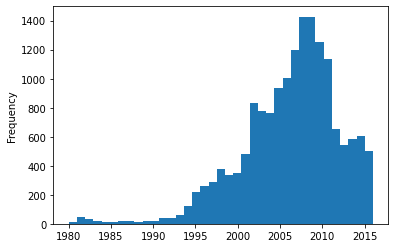

In [23]:
games['year_of_release'].plot(kind='hist', bins=37)

Мы видим, что с 1980 по 1990 выпуск игр имел "вялый" характер, затем, видимо, возможности графики и прочего, о чем я, как человек непосвященный, не знаю, привели к росту выпуска игр, который сохранялся вплоть до 2010 года, затем мы видим спад - скорее всего рынок перенасытился и инвесторы перестали активно поддерживать процесс. Мы в сво очередь можем прийти к выводу, что для анализа более важен период с 1990 по 2016 гг.

### Как менялись продажи по платформам

Сначала выберем платформы с наибольшими суммарными продажами:

<AxesSubplot:xlabel='platform'>

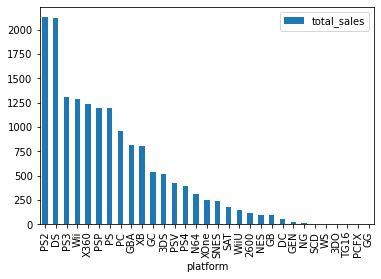

In [24]:
platforms = games.pivot_table(index='platform', values = 'total_sales', aggfunc = 'count')
platforms.sort_values(by='total_sales', ascending=False).plot(kind='bar')

Предлагаю составить список из первых 15 позиций - будем их считать самыми востребованными:

In [25]:
leaders = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC', '3DS', 'PSV', 'PS4', 'N64']
years = [1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 
         1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 
         2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 
         2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
         2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 
         2015.0, 2016.0
] 

Теперь отгруппируем таблицу по этому списку и построим распределение по годам (исходя из прошлого исследования, актуальными годами мы будем считать период с 1990 по 2016 гг.)

In [26]:
topical = games.query('platform in @leaders and year_of_release in @years')
topical

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:xlabel='year_of_release'>

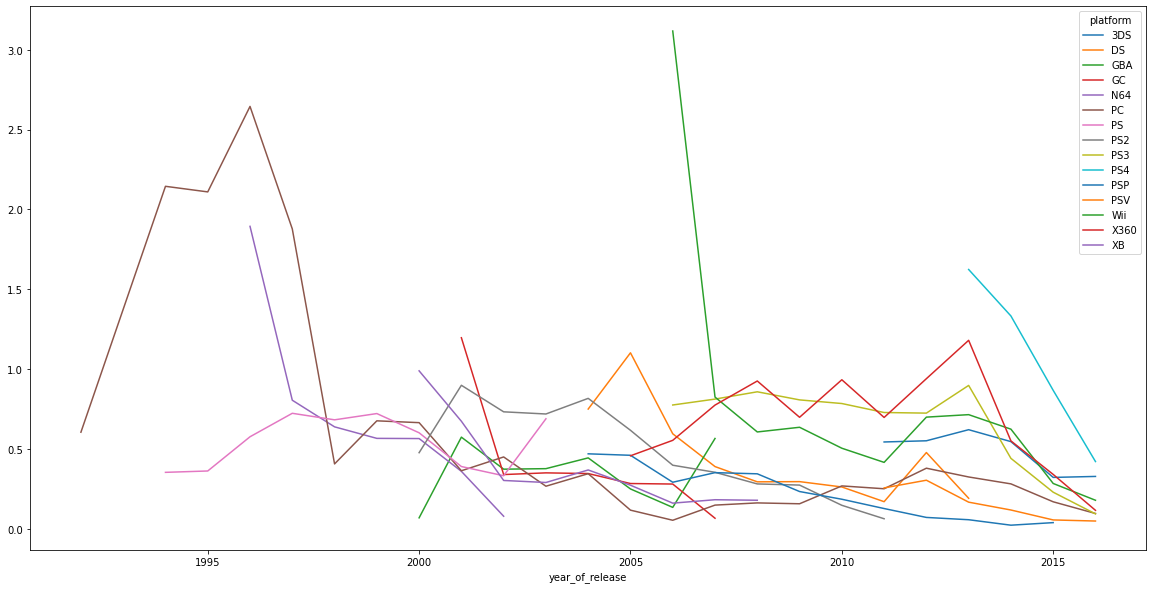

In [27]:
topical.pivot_table(index='year_of_release', columns='platform', values='total_sales').plot(figsize=(20,10))

Проанализируем увиденное:
1. Платформа DS: просуществовала с 2004 года по 2013 (9 лет)
2. Платформа GBA просуществовала с 2000 по 2007 гг. (7 лет)
3. Платформа PC - долгожительница - с 1990 по настоящее время. (26 лет)
4. Платформа PS - с 1994 по 2003 гг. (9 лет)
5. Платформа PS2 - с 2000 по 2011 г.г. (11 лет)
6. Платформа PS3 - с 2006 по настоящее время (10 лет)
7. Платформа PSP - с 2004 по 2015 гг. (11 лет)
8. Платформа Wii - с 2006 по настящее время (10 лет)
9. Платформа X360 - с 2005 по настоящее время (11 лет)
10. Платформа XB - с 2000 по 2007 гг. (7 лет)
11. Платформа GC - с 2001 по 2007 гг. (6 лет)
12. Платформа 3DS - с 2011 по настоящее время (5 лет)
13. Платформа PSV - с 2011 по настоящее время (5 лет)
14. Платформа PS4 - с 2013 по настоящее время (3 года)
15. Платформа N64 - с 1996 по 2002 гг. (6 лет)

Получается, что платформы, которые завершили свое существование, в среднем прожили 8 лет. 
Очевидным долгожителем является платформа PC - 26 лет в стою и не сдается.
Годы появления: с 1990 по 1999 гг. появилось всего 3 значительных игрока, в то время, как с 2000 по 2013 гг. их появилось сразу 12 - т.е. плотность появление со временем увеличивается.

Так же мы видим, что информацию до 2015 года рассматривать не стоит, так как в этом году закончилось "умирание" платформ, остались те, которые работают сейчас. Именно их и стоит анализировать. Предлагаю сгруппировать нашу таблицу в соответствии с указанной датой.


In [28]:
games = games.query('year_of_release >= 2015')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<AxesSubplot:xlabel='year_of_release'>

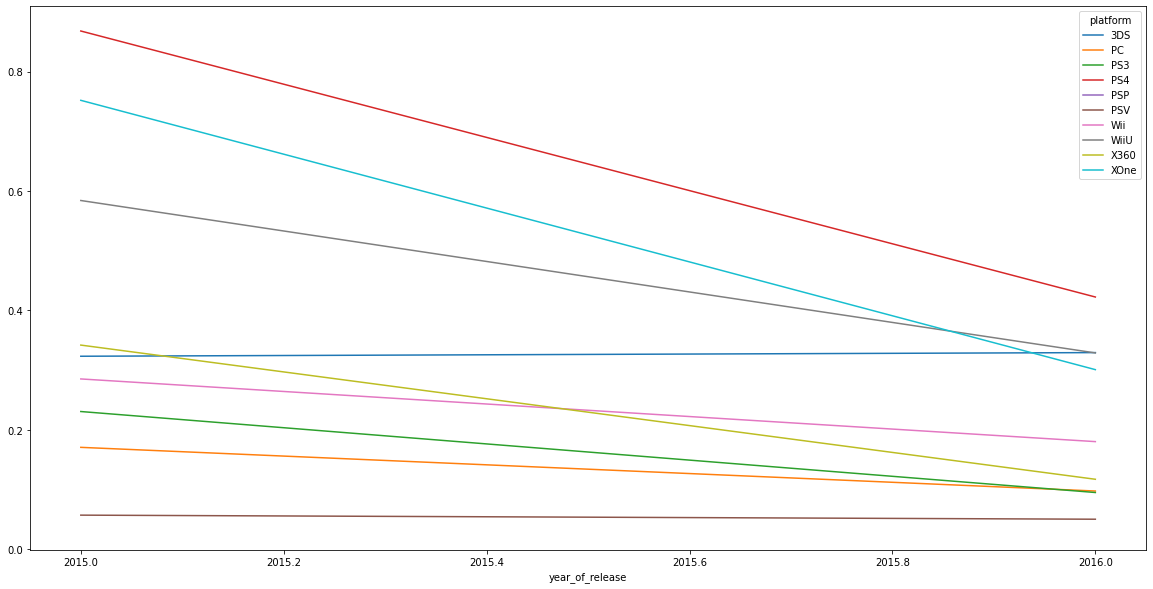

In [29]:
games.pivot_table(index='year_of_release', columns='platform', values='total_sales').plot(figsize=(20,10))

У нас есть 9 платформ. Лидеры по продажам - PS4 (была на пике в 2013 году - год появления, и с тех пор продажи равномерно снижаются), XOne (ведет себя так же как PS4), WiiU (падение продаж у неё выражено менее ярко). Но все они сейчас идут на спад. Одна платформа - 3DS - единственная набирает обороты. Так же в ТОП5 входит X360. В течение ближайшего года эти платформы наверняка продожат свое существование и будут приносить стабильный доход, так как мы помним, что средний срок жизни платформы - 8 лет. Теперь отфильтруем таблицу по этим пяти платформам. Назовем таблицу games_top.

In [30]:
top = ['PS4', 'XOne', 'WiiU', '3DS', 'X360']

In [31]:
games_top = games.query('platform in @top')
games_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39


### Ящик с усами. 

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

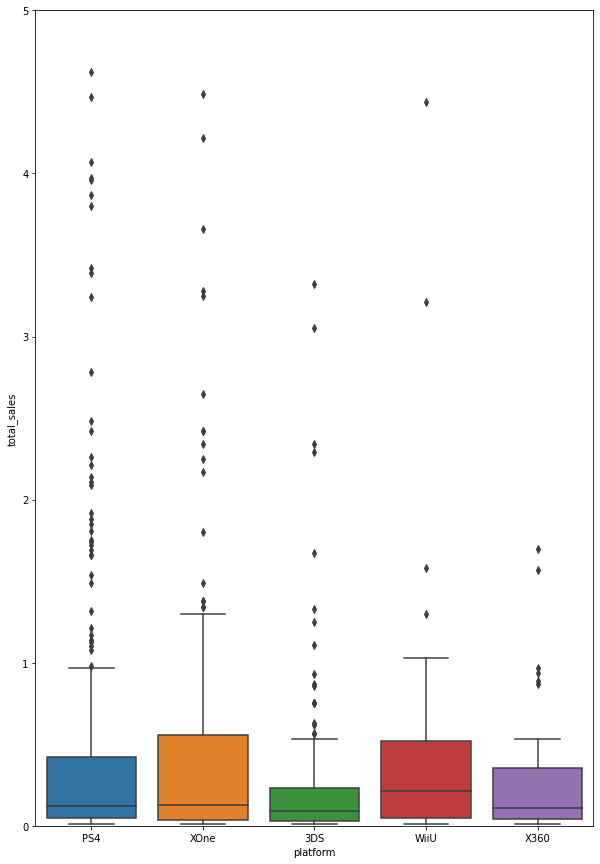

In [32]:
plt.figure(figsize=(10, 15))
plt.ylim([0,5])
sns.boxplot(data=games_top, x='platform', y='total_sales')

Мы видим, что медиана находится на уровне 0,3 и ниже, она ниже среднего. Есть выбросы - так называемых бетселлеров - которые фактически и формируют рынок, но в основной массе это игровой "мусор".

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами на примере платформы XOne.

In [33]:
XOne = games_top.query('platform == "XOne"')
XOne.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
342,Star Wars Battlefront (2015),XOne,2015.0,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN,3.66
413,Gears of War: Ultimate Edition,XOne,2015.0,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

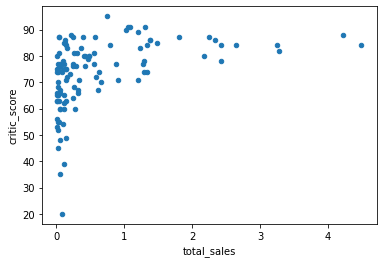

In [34]:
XOne.plot(x='total_sales', y='critic_score', kind='scatter')

In [35]:
XOne['total_sales'].corr(XOne['critic_score'])

0.430888745821368

Присутствует положительная корреляция (незначительная), т.е. чем выше оценка критиков, тем выше продажи. Но т.к. она выражена очень неярко, связывать эти два показателя между собой не стоит.

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

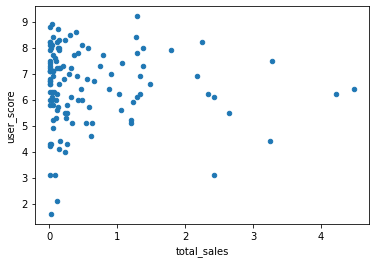

In [36]:
XOne.plot(x='total_sales', y='user_score', kind='scatter')

In [37]:
XOne['total_sales'].corr(XOne['user_score'])

-0.04146733387366271

Ориентируясь на коэффициент Пирсона можно сказать, что никакой ярковыраженной взаимосвязи между оценками пользователей и продажами игр на этой платформе нет.

### Соотнесём выводы с продажами игр на других платформах.

#### Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для всех остальных выбранных нами платформ.

In [38]:
other = games_top.query('platform != "XOne"')
other.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Возьмем и промониторим отдельно платформы, которые не включили в список "избранных", например PS3  и Wii посмотрим, как они ведут себя по-отдельности:

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

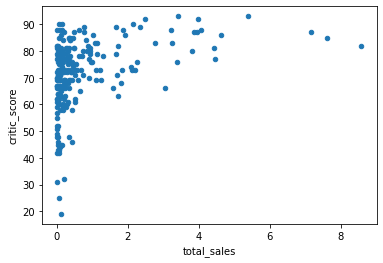

In [39]:
other.plot(x='total_sales', y='critic_score', kind='scatter')

In [40]:
other['total_sales'].corr(other['critic_score'])

0.36905090746877667

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

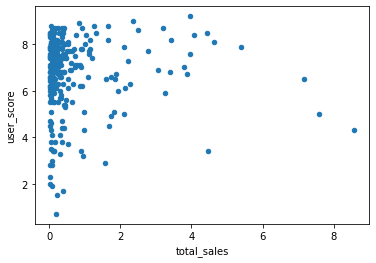

In [41]:
other.plot(x='total_sales', y='user_score', kind='scatter')

In [42]:
other['total_sales'].corr(other['user_score'])

0.0012285759090274364

#### Возьмем и промониторим отдельно платформы, которые мы включили в список "избранных", например X360 и PS4 посмотрим, как они ведут себя по-отдельности:

##### PS4

In [43]:
ps4 = games.query('platform == "PS4"')
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

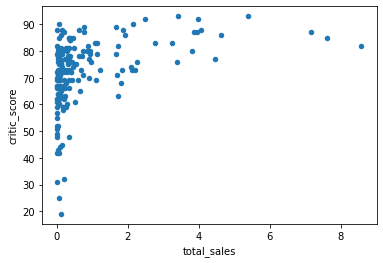

In [44]:
ps4.plot(x='total_sales', y='critic_score', kind='scatter')

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

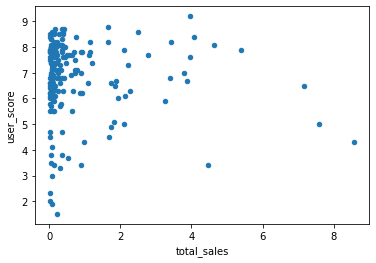

In [45]:
ps4.plot(x='total_sales', y='user_score', kind='scatter')

In [46]:
ps4['total_sales'].corr(ps4['user_score'])

-0.05973845712638215

In [47]:
ps4['total_sales'].corr(ps4['critic_score'])

0.3928485555130601

Опять же корреляция присутствует, но совсем небольшая. У критиков все-таки чутьё лучше, они чаще одобряют прибыльные проекты. Но в общей сложности говорить о взимосвязи не стоит.

##### X360

In [48]:
x360 = games.query('platform == "X360"')
x360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1049,Call of Duty: Black Ops 3,X360,2015.0,Shooter,1.14,0.40,0.0,0.16,NaN,NaN,NaN,1.70
1182,FIFA 16,X360,2015.0,Sports,0.57,0.88,0.0,0.12,NaN,2.9,E,1.57
2114,Madden NFL 16,X360,2015.0,Sports,0.85,0.02,0.0,0.10,NaN,5.1,E,0.97
2183,NBA 2K16,X360,2015.0,Sports,0.79,0.05,0.0,0.10,NaN,3.2,E,0.94
2360,Minecraft: Story Mode,X360,2015.0,Adventure,0.48,0.33,0.0,0.08,NaN,NaN,NaN,0.89


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

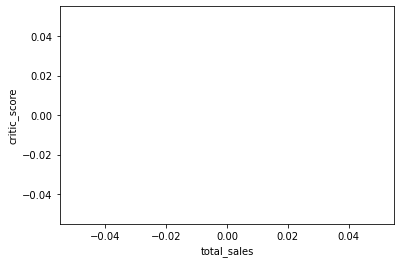

In [49]:
x360.plot(x='total_sales', y='critic_score', kind='scatter')

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

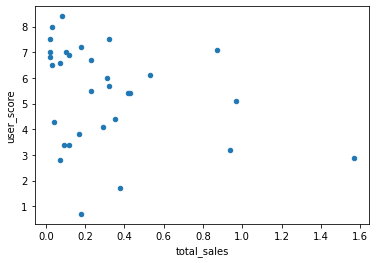

In [50]:
x360.plot(x='total_sales', y='user_score', kind='scatter')

In [51]:
x360['total_sales'].corr(x360['user_score'])

-0.2813082274094897

In [52]:
x360['total_sales'].corr(x360['critic_score'])

nan

У платформы X360 очевидно нет никакой взаимосвязи между оценками критиков или пользователей и продажами. Коэффициенты Пирсона нам это показывают наглядно.

Можно смело делать вывод о том, что XOne не является исключением, и что такое поведение характерно для всех платформ нашей выборки: никакой ярковыраженной взаимосвязи между оценками пользователей, критиков и продажами игр нет. Есть небольшая связь между оценками критиков и продажами: чем выше оценки, тем выше продажи. Но она очень незначительная, поэтому выводов о прямой взаимосвЯзи я бы делать не стала.

### Посмотрим на общее распределение игр по жанрам. Найдем самых прибыльные жанры. Посмотрим, выделяются ли жанры с высокими и низкими продажами.

Для корректного анализа данных будем использовать медианное значение показателей total_sales:

In [53]:
genres = games_top.pivot_table(index='genre', values = 'total_sales', aggfunc = 'median')
genres

,total_sales
genre,
Action,0.090
Adventure,0.050
Fighting,0.205
Misc,0.080
Platform,0.120
Puzzle,0.045
Racing,0.095
Role-Playing,0.205
Shooter,0.570


<AxesSubplot:xlabel='genre'>

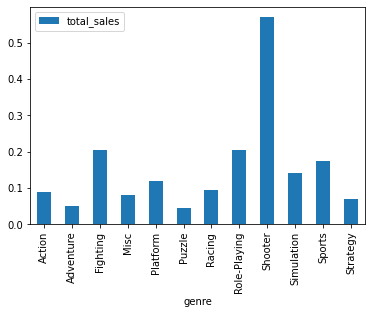

In [54]:
genres.plot(kind='bar')

Самыми прибыльным жанром очевидно является  Shooter, второе место практически разделяют Fidhting, Sports и Role-Playing.Самые низкие продажи у жанра Puzzle, однако не силён отрыв между ним и Adventure, Strategy, Misc. Т.е. можно сказать, что очевидный лидер имеется.

## Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Их различия в долях продаж.

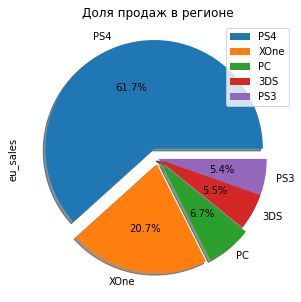

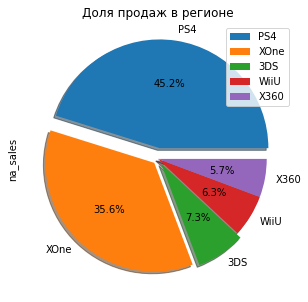

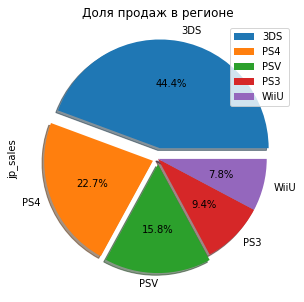

In [55]:
regions = ['eu_sales','na_sales', 'jp_sales']
for i in regions:
    (games.pivot_table(index='platform', values=i, aggfunc='sum').sort_values(by=i, ascending = False).head(5)
                                .plot(kind='pie', y=i, figsize=(5,5), explode = (0.1, 0.05, 0.05, 0, 0), autopct= '%1.1f%%', shadow=True, title='Доля продаж в регионе'))
plt.show()

Итог: Вкусы европейцев и жителей Северной Америки касательно игровых платформ схож - они предпочитают PS4, в то время, как японцы скорее выберут 3DS

### Самые популярные жанры (топ-5). В чём разница?

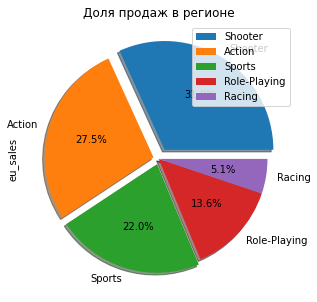

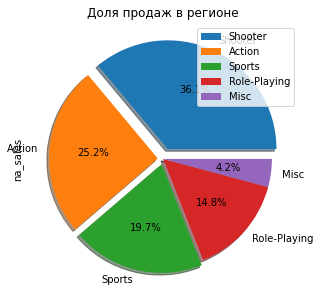

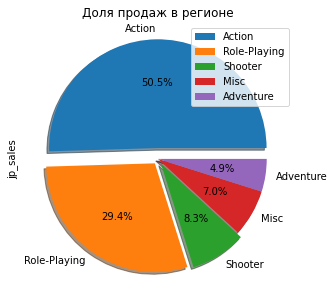

In [56]:
regions = ['eu_sales','na_sales', 'jp_sales']
for i in regions:
    (games.pivot_table(index='genre', values=i, aggfunc='sum').sort_values(by=i, ascending = False).head(5)
                                .plot(kind='pie', y=i, figsize=(5,5), explode = (0.1, 0.05, 0.05, 0, 0), autopct= '%1.1f%%', shadow=True, title='Доля продаж в регионе'))
plt.show()

А вот Shooter и Action любят все, и Япония тут не исключение.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Предлагаю составить сводную таблицу с рейтингами по кадому региону и посмотреть, что получится:

In [57]:
ratings = games.pivot_table(index='rating', values=['eu_sales','na_sales', 'jp_sales'], aggfunc='sum')
ratings

,eu_sales,jp_sales,na_sales
rating,,,
E,34.83,5.25,26.59
E10+,11.54,3.27,17.87
M,45.54,4.29,47.03
T,20.32,7.70,22.86


Попробуем визуализировать данные:

<AxesSubplot:xlabel='rating'>

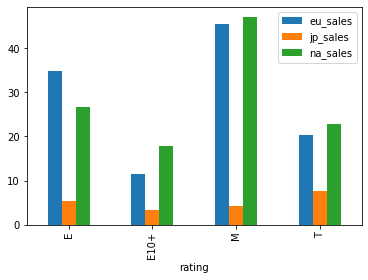

In [58]:
ratings.plot(kind='bar')

Очевидно, что самые популярные рейтинги в Европе и Северной Америке - M - для взрослых. В Японии же предпочитают T - для подростков.

В качестве вывода проведенного исследования можно сказать следующее: европейцы и североамериканцы очень схожи в своих вкусах и касательно игровых платформ, и касательно рейтингов игр. Япония - островное государство со своими вкусами практически во всем. Игры в этом смысле исключением не стали.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Мы будем проверять гипотезу о равенстве средних двух генеральных совокупностей по имеющимся выборкам. Поведение платформы Xbox One никак не зависит от поведения платформы PC так что наши совокупности независимы друг от друга. Т.о. мы можем применить для проверки гипотез  t-критерий Стьюдента (независимые выборки) - у нас для этого есть одно препятствие (выборки разного размера, о равенстве их дисперсий нельзя утверждать с уверенностью), но для того, чтобы его обойти есть equal_var=False).
Для начала сформулируем нулевую и альтернативную гипотезы. H₀ всегда формулируется так, чтобы использовать знак равенства:

1. H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
2. H1: средний пользовательский рейтинг платформ Xbox One и PC различается

Сначала сформируем необходимые нам массивы данных.

In [59]:
games_xbox_one = games.query('platform == "XOne"')
games_xbox_one.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
342,Star Wars Battlefront (2015),XOne,2015.0,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN,3.66
413,Gears of War: Ultimate Edition,XOne,2015.0,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28


In [60]:
xbox_one = games_xbox_one['user_score']
xbox_one.head()

99     NaN
242    6.4
270    6.2
342    NaN
413    7.5
Name: user_score, dtype: float64

In [61]:
games_pc = games.query('platform == "PC"')
games_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1530,Fallout 4,PC,2015.0,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2851,The Witcher 3: Wild Hunt,PC,2015.0,Role-Playing,0.21,0.46,0.0,0.05,93.0,9.3,M,0.72
3123,Farming Simulator 17,PC,2016.0,Simulation,0.03,0.58,0.0,0.04,64.0,8.0,E,0.65
3666,Star Wars Battlefront (2015),PC,2015.0,Shooter,0.13,0.38,0.0,0.04,NaN,NaN,NaN,0.55


In [62]:
pc = games_pc['user_score']
pc.head()

1530    5.4
1730    7.9
2851    9.3
3123    8.0
3666    NaN
Name: user_score, dtype: float64

Так как срезы у нас разные, параметр equal_var установим как False. Установим в качестве критического уровня статистической значимости alpha классическое значение в 0,05 и проверим нашу гипотезу:

In [63]:
alpha = 0.05
results = st.ttest_ind(
    xbox_one,
    pc,
    equal_var=False,
    nan_policy='omit')
print('р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

р-значение: 0.2946308864003399
Не получилось опровергнуть нулевую гипотезу


Получается, что скорее всего средний пользовательский рейтинг платформ Xbox One и PC одинаковый.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Мы будем проверять гипотезу о равенстве средних двух генеральных совокупностей по имеющимся выборкам. Поведение поведение пользовательских рейтингов разных жанров никак не зависи друг от друга, так что наши совокупности независимы друг от друга. Т.о. мы можем применить для проверки гипотез  t-критерий Стьюдента (независимые выборки) - у нас для этого есть одно препятствие (выборки разного размера, о равенстве их дисперсий нельзя утверждать с уверенностью), но для того, чтобы его обойти есть equal_var=False).
Для начала сформулируем нулевую и альтернативную гипотезы. H₀ всегда формулируется так, чтобы использовать знак равенства:

1. H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
2. H1: средний пользовательский рейтинг жанров Action и Sports различается

Сначала сформируем необходимые нам массивы данных.

In [64]:
games_action = games.query('genre == "Action"')
games_action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
231,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
305,Batman: Arkham Knight,PS4,2015.0,Action,1.53,1.69,0.10,0.64,87.0,7.6,M,3.96
390,Metal Gear Solid V: The Phantom Pain,PS4,2015.0,Action,1.09,1.36,0.49,0.48,93.0,8.2,M,3.42
396,Assassin's Creed Syndicate,PS4,2015.0,Action,0.81,1.99,0.07,0.52,76.0,6.8,M,3.39
406,Monster Hunter X,3DS,2015.0,Action,0.27,0.21,2.79,0.05,NaN,NaN,NaN,3.32


In [65]:
action = games_action['user_score']
action.head()

231    8.1
305    7.6
390    8.2
396    6.8
406    NaN
Name: user_score, dtype: float64

In [66]:
games_sports = games.query('genre == "Sports"')
games_sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
314,NBA 2K16,PS4,2015.0,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
417,FIFA 16,XOne,2015.0,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
420,Madden NFL 16,PS4,2015.0,Sports,2.34,0.30,0.00,0.60,83.0,5.9,E,3.24


In [67]:
sports = games_sports['user_score']
sports.head()

77     4.3
94     5.0
314    6.7
417    4.4
420    5.9
Name: user_score, dtype: float64

Так как срезы у нас разные, параметр equal_var установим как False. Установим в качестве критического уровня статистической значимости alpha классическое значение в 0,05 и проверим нашу гипотезу:

In [68]:
alpha = 0.05
results = st.ttest_ind(
    action,
    sports,
    equal_var=False,
    nan_policy='omit')
print('р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

р-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Получается, что скорее всего средний пользовательский рейтинг жанров Action и Sports различается.

## Общий вывод.



Для анализа мы выбрали период 2015, 2016 гг. - так как они дают самые актуальные данные. 
Что касается хронологии: с 2010 года игровой бизнес пошел на спад. С чем это связан, предполагать не возьмусь, но факт остается фактом.
Надо отметить, что на игровом рынке выпускается очень много "шлака", и только немногие бестселлеры определяют тенденции.
Что касается игровых платформ, то их появление и "вымирание" неравномерны. Срок "жизни" платформы - около 8 лет, так что ориентируясь на 2015 и 2017 гг. можно смело прогнозировать 2017 год. 
Мы выявили ТОП-5 самых популярных платформ и посмотрели, какова их доля на рынках Северной Америки, Европы и Японии. Отметим, что Япония очень своеобразна в своих вкусах, так что, если планируете покрыть максимальное количество пользователей, то стоит ориентироваться на Северную Америку и Европу - эти регионы схожи по вкусам и относительно платформы: предпочитают PS4, и относительно возрастной категории игр - для взрослых. В качестве жанра стоит выбрать Shooter.
Для проведения аналица мы провели предобработку данных - удалили в некоторых случаях пропуски, заменили типы данных. Затем мы строили графики, чтобы выяснить, сколько игр выпускалось в разные годы, как менялись продажи по платформам, как разные кретерии влияли на продажи (жанры, рейтинги, отзывы, регионы).